In [1]:
import seaborn as sns
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import six

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


%matplotlib inline

import anchor
modality_to_color = anchor.MODALITY_TO_COLOR.copy()
modality_to_color['constitutive'] = '#262626'
modality_order = ['excluded', 'bimodal', 'included', 'constitutive']
modality_palette = [modality_to_color[m] for m in modality_order]


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

import pybedtools

facet_kws = dict(col='phenotype', hue='modality', hue_order=modality_order, palette=modality_palette,
                 col_order=study.phenotype_order, size=2)


folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)
bed_folder = '{}/bed'.format(folder)



splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-05-13 11:25:39	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-05-13 11:25:39	Parsing datapackage to create a Study object
2016-05-13 11:26:12	Initializing Study
2016-05-13 11:26:12	Initializing Predictor configuration manager for Study
2016-05-13 11:26:12	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-05-13 11:26:12	Added ExtraTreesClassifier to default predictors
2016-05-13 11:26:12	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-05-13 11:26:12	Added ExtraTreesRegressor to default predictors
2016-05-13 11:26:12	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-05-13 11:26:12	Added GradientBoostingClassifier to default predictors
2016-05-13 11:26:12	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
study.splicing.minimum_samples

10

In [3]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [4]:
study.supplemental.modalities_tidy.head()

,phenotype,event_id,modality
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,bimodal
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included
3,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:10...,bimodal


In [5]:
figure_folder = 'figures' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/sequence_conservation_features'
! mkdir $figure_folder

mkdir: cannot create directory `figures': File exists


## GC Content

In [6]:
csv = 'gc_content.csv'
alternative_gc = pd.read_csv('{}/{}'.format(alternative_feature_folder, csv), index_col=0, squeeze=True, header=None)
alternative_gc.name = 'GC'
six.print_(alternative_gc.shape)
alternative_gc.head()

(43903,)


0
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-    48.571429
exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102003455-102003534:-@exon:chr10:101997940-101997988:-    40.000000
exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-    37.254902
exon:chr10:102021736-102021820:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-    37.254902
exon:chr10:102021736-102021820:-@exon:chr10:102020723-102020785:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-    44.444444
Name: GC, dtype: float64

In [7]:
modalities_gc = study.supplemental.modalities_tidy.join(alternative_gc, on='event_id')
modalities_gc.head()

,phenotype,event_id,modality,GC
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,52.980132
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,bimodal,50.322581
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,50.214592
3,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,51.923077
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:10...,bimodal,58.878505


In [8]:
pd.options.display.max_colwidth = 100

In [9]:
modalities_gc.event_id[modalities_gc.GC.isnull()]

Series([], Name: event_id, dtype: object)

In [10]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

In [11]:
constitutive_gc = pd.read_csv('{}/{}'.format(constitutive_feature_folder, csv), index_col=0, squeeze=True, header=None)
constitutive_gc.name = 'GC'
six.print_(constitutive_gc.shape)
constitutive_gc.head()

(5893,)


0
exon:chr10:102039881-102039985:-    44.761905
exon:chr10:102040691-102040810:-    34.166667
exon:chr10:102045854-102045970:-    57.264957
exon:chr10:102286732-102286831:-    60.000000
exon:chr10:102289123-102289263:-    58.156028
Name: GC, dtype: float64

In [12]:
constitutive_gc.index.name = 'event_id'
constitutive_gc.head()

event_id
exon:chr10:102039881-102039985:-    44.761905
exon:chr10:102040691-102040810:-    34.166667
exon:chr10:102045854-102045970:-    57.264957
exon:chr10:102286732-102286831:-    60.000000
exon:chr10:102289123-102289263:-    58.156028
Name: GC, dtype: float64

In [13]:
constitutive_gc_df = constitutive_gc.to_frame()
constitutive_gc_df['modality'] = 'constitutive'
dfs = []
for phenotype in study.phenotype_order:
    df = constitutive_gc_df.copy().reset_index()
    df['phenotype'] = phenotype
    dfs.append(df)
constitutive_gc_df = pd.concat(dfs)
six.print_(constitutive_gc_df.shape)
constitutive_gc_df.head()

(17679, 4)


,event_id,GC,modality,phenotype
0,exon:chr10:102039881-102039985:-,44.761905,constitutive,iPSC
1,exon:chr10:102040691-102040810:-,34.166667,constitutive,iPSC
2,exon:chr10:102045854-102045970:-,57.264957,constitutive,iPSC
3,exon:chr10:102286732-102286831:-,60.000000,constitutive,iPSC
4,exon:chr10:102289123-102289263:-,58.156028,constitutive,iPSC


In [14]:
modalities_gc_df = pd.concat([modalities_gc, constitutive_gc_df])
six.print_(modalities_gc_df.shape)
modalities_gc_df.head()

(43696, 4)


,GC,event_id,modality,phenotype
0,52.980132,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,included,MN
1,50.322581,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,bimodal,MN
2,50.214592,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,MN
3,51.923077,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,MN
4,58.878505,exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,bimodal,MN


In [15]:
prefix = 'gc_content'
csv = '{}.csv'.format(prefix)

In [16]:
import seaborn as sns
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


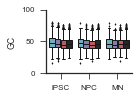

In [17]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.boxplot(x='phenotype', hue='modality', y='GC', 
            data=modalities_gc_df, hue_order=modality_order, palette=modality_palette, 
            order=study.phenotype_order, linewidth=1, fliersize=2)
ax.locator_params('y', nbins=4)
ax.legend_.set_visible(False)
sns.despine()
ax.set(xlabel='')
fig.tight_layout()
fig.savefig('{}/gc_content_boxplot.pdf'.format(figure_folder))

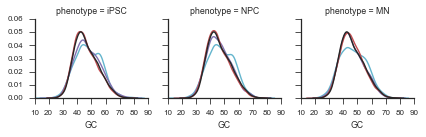

In [18]:
g = sns.FacetGrid(col='phenotype', hue='modality', size=2,
            data=modalities_gc_df, hue_order=modality_order, palette=modality_palette, 
            col_order=study.phenotype_order)

g.map(sns.distplot, 'GC', hist=False)

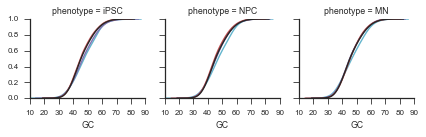

In [19]:
g = sns.FacetGrid(col='phenotype', hue='modality', size=2,
            data=modalities_gc_df, hue_order=modality_order, palette=modality_palette, 
            col_order=study.phenotype_order)

g.map(sns.distplot, 'GC', kde_kws=dict(cumulative=True), hist=False)

### Statistical enrichment - pairwise mannwhitneyu

MN
NPC
iPSC
modality1      excluded    bimodal   included  constitutive
excluded            NaN   0.188345  17.327595     10.735088
bimodal        0.188345        NaN  11.562689      5.408372
included      17.327595  11.562689        NaN      0.469531
constitutive  10.735088   5.408372   0.469531           NaN


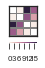

In [20]:
import itertools
from scipy.stats.mstats import mannwhitneyu

col = 'GC'

lines = []

for phenotype, phenotype_df in modalities_gc_df.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
#     constitutive = grouped.get_group('constitutive')
    
    for (modality1, df1), (modality2, df2) in itertools.combinations(grouped, 2):
#         if modality == 'constitutive':
#             continue
#         six.print_('\t', modality1, modality2)

        result = mannwhitneyu(df1[col], df2[col])
#         six.print_('\t\t', result)
#         results.loc[modality1, modality2] = result.pvalue
        lines.append([phenotype, modality1, modality2, result.pvalue, result.statistic])
enrichment = pd.DataFrame(lines, columns=['phenotype', 'modality1', 'modality2', 'p_value', 'statistic'])

# multiple testing correction
enrichment['bonferonni_p_value'] = enrichment['p_value'] * enrichment.shape[0]
enrichment.head()

# Transform tidy dataframe into 2d matrix
enrichment_2d = enrichment.groupby('phenotype').apply(
    lambda x: x.pivot(index='modality1', columns='modality2', values='bonferonni_p_value'))
enrichment_2d = enrichment_2d.loc[:, modality_order]
enrichment_2d_log10 = -np.log10(enrichment_2d)

# Plot p-value heatmap
fig, ax = plt.subplots(figsize=(.5, .75))
ipsc = enrichment_2d_log10.loc['iPSC']
ipsc = ipsc.loc[modality_order]
ipsc = ipsc.T.fillna(0) + ipsc.fillna(0)
ipsc = ipsc.replace(0, np.nan)
six.print_(ipsc)

sns.heatmap(ipsc, vmin=0, linewidth=0.5, linecolor='grey', cbar_kws=dict(orientation='horizontal'))
ax.set(xticks=[], yticks=[], xlabel='', ylabel='');
sns.despine(left=False, bottom=False, right=False, top=False)
fig.savefig('{}/{}_p_value_heatmap.pdf'.format(figure_folder, col))

## Exon conservation
Used `bigWigAverageOverBed`

In [21]:
! bigWigAverageOverBed

bigWigAverageOverBed - Compute average score of big wig over each bed, which may have introns.
usage:
   bigWigAverageOverBed in.bw in.bed out.tab
The output columns are:
   name - name field from bed, which should be unique
   size - size of bed (sum of exon sizes
   covered - # bases within exons covered by bigWig
   sum - sum of values over all bases covered
   mean0 - average over bases with non-covered bases counting as zeroes
   mean - average over just covered bases
Options:
   -bedOut=out.bed - Make output bed that is echo of input bed but with mean column appended
   -sampleAroundCenter=N - Take sample at region N bases wide centered around bed item, rather
                     than the usual sample in the bed item.



In [22]:
txt = 'phastcons_placental_mammal.txt'
! head $constitutive_feature_folder/$txt

exon:chr1:10002682-10002840:-	158	158	17.289	0.109424	0.109424
exon:chr1:104070317-104070364:+	47	47	46.991	0.999809	0.999809
exon:chr1:104076361-104076479:+	118	118	91.811	0.778059	0.778059
exon:chr1:10464218-10464336:+	118	118	94.521	0.801025	0.801025
exon:chr1:10468128-10468197:+	69	69	54.443	0.789029	0.789029
exon:chr1:10471475-10471609:+	134	134	106.817	0.797142	0.797142
exon:chr1:10473119-10473308:+	189	189	156.75	0.829365	0.829365
exon:chr1:10477044-10477174:+	130	130	97.078	0.746754	0.746754
exon:chr1:10477433-10477566:+	133	133	124.756	0.938015	0.938015
exon:chr1:10478883-10478982:+	99	99	86.846	0.877232	0.877232


In [23]:
columns = ['event_id', 'size', 'covered', 'sum', 'mean0', 'mean']

In [24]:
constitutive_conservation = pd.read_table('{}/{}'.format(constitutive_feature_folder, txt), header=None, names=columns,
                                         index_col=0)
six.print_(constitutive_conservation.shape)
constitutive_conservation.head()

(5893, 5)


,size,covered,sum,mean0,mean
event_id,,,,,
exon:chr1:10002682-10002840:-,158,158,17.289,0.109424,0.109424
exon:chr1:104070317-104070364:+,47,47,46.991,0.999809,0.999809
exon:chr1:104076361-104076479:+,118,118,91.811,0.778059,0.778059
exon:chr1:10464218-10464336:+,118,118,94.521,0.801025,0.801025
exon:chr1:10468128-10468197:+,69,69,54.443,0.789029,0.789029


In [25]:
alternative_conservation = pd.read_table('{}/{}'.format(alternative_feature_folder, txt), header=None, names=columns,
                                         index_col=0)
six.print_(alternative_conservation.shape)
alternative_conservation.head()

(26379, 5)


,size,covered,sum,mean0,mean
event_id,,,,,
exon:chr1:100316591-100316680:+@exon:chr1:100318117-100318259:+@exon:chr1:100327059-100327269:+,142,142,1.270,0.008944,0.008944
exon:chr1:100376268-100376403:+@exon:chr1:100377961-100378073:+@exon:chr1:100379083-100379294:+,112,112,102.294,0.913339,0.913339
exon:chr1:100435535-100435718:+@exon:chr1:100440527-100440625:+@exon:chr1:100459093-100459297:+,98,98,2.720,0.027755,0.027755
exon:chr1:100515465-100515560:+@exon:chr1:100524222-100524284:+@exon:chr1:100525434-100525561:+,62,62,61.983,0.999726,0.999726
exon:chr1:100533533-100533751:+@exon:chr1:100534029-100534142:+@exon:chr1:100535170-100535241:+,113,113,107.617,0.952363,0.952363


In [26]:
def make_phenotype_modality_format(constitutive_df):
    constitutive_df = constitutive_df.copy().reset_index()
    constitutive_df['modality'] = 'constitutive'
    dfs = []
    for phenotype in study.phenotype_order:
        df = constitutive_df.copy()#.reset_index()
        df['phenotype'] = phenotype
        dfs.append(df)
    df = pd.concat(dfs)
    six.print_(df.shape)
#     df.head()
    return df

In [27]:
constitutive_conservation.head()

,size,covered,sum,mean0,mean
event_id,,,,,
exon:chr1:10002682-10002840:-,158,158,17.289,0.109424,0.109424
exon:chr1:104070317-104070364:+,47,47,46.991,0.999809,0.999809
exon:chr1:104076361-104076479:+,118,118,91.811,0.778059,0.778059
exon:chr1:10464218-10464336:+,118,118,94.521,0.801025,0.801025
exon:chr1:10468128-10468197:+,69,69,54.443,0.789029,0.789029


In [28]:
constitutive_df_modality = make_phenotype_modality_format(constitutive_conservation)
constitutive_df_modality.head()

(17679, 8)


,event_id,size,covered,sum,mean0,mean,modality,phenotype
0,exon:chr1:10002682-10002840:-,158,158,17.289,0.109424,0.109424,constitutive,iPSC
1,exon:chr1:104070317-104070364:+,47,47,46.991,0.999809,0.999809,constitutive,iPSC
2,exon:chr1:104076361-104076479:+,118,118,91.811,0.778059,0.778059,constitutive,iPSC
3,exon:chr1:10464218-10464336:+,118,118,94.521,0.801025,0.801025,constitutive,iPSC
4,exon:chr1:10468128-10468197:+,69,69,54.443,0.789029,0.789029,constitutive,iPSC


In [29]:
modalities_conservation = study.supplemental.modalities_tidy.join(alternative_conservation, on='event_id')
modalities_conservation.head()

,phenotype,event_id,modality,size,covered,sum,mean0,mean
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,included,150,150,146.817,0.978780,0.978780
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,bimodal,154,154,150.026,0.974195,0.974195
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,232,232,162.071,0.698582,0.698582
3,MN,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,155,155,124.061,0.800394,0.800394
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,bimodal,106,106,76.374,0.720509,0.720509


In [30]:
modalities_conservation_constitutive = pd.concat([modalities_conservation, constitutive_df_modality])
modalities_conservation_constitutive.head()

,covered,event_id,mean,mean0,modality,phenotype,size,sum
0,150,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,0.978780,0.978780,included,MN,150,146.817
1,154,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,0.974195,0.974195,bimodal,MN,154,150.026
2,232,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,0.698582,0.698582,included,MN,232,162.071
3,155,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,0.800394,0.800394,included,MN,155,124.061
4,106,exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,0.720509,0.720509,bimodal,MN,106,76.374


In [31]:
from flotilla.visualize.generic import cdfplot

g = sns.FacetGrid(col='phenotype', hue='modality', size=2, #aspect=.75,
            data=modalities_conservation_constitutive, hue_order=modality_order, palette=modality_palette, 
            col_order=study.phenotype_order)

g.map(cdfplot, 'mean')
g.set_xlabels('mean Placental PhastCons')
g.set_ylabels('Cumulative distribution')
g.set(xlim=(0, 1), ylim=(0, 1), yticks=(0, 0.5, 1), xticks=(0, 0.5, 1))
g.fig.tight_layout()
g.savefig('{}/conservation_cdf.pdf'.format(figure_folder))

### Statistical enrichment - pairwise Mann whitney U test vs all

MN
NPC
iPSC
modality1       excluded     bimodal    included  constitutive
excluded             NaN   95.258292  297.880866    306.690833
bimodal        95.258292         NaN   95.565153    106.736241
included      297.880866   95.565153         NaN     -0.545961
constitutive  306.690833  106.736241   -0.545961           NaN


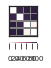

In [33]:
from scipy.stats.mstats import mannwhitneyu

col = 'mean'

lines = []

for phenotype, phenotype_df in modalities_conservation_constitutive.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
#     constitutive = grouped.get_group('constitutive')
    
    for (modality1, df1), (modality2, df2) in itertools.combinations(grouped, 2):
        result = mannwhitneyu(df1[col], df2[col])
        lines.append([phenotype, modality1, modality2, result.pvalue, result.statistic])
enrichment = pd.DataFrame(lines, columns=['phenotype', 'modality1', 'modality2', 'p_value', 'statistic'])

# multiple testing correction
enrichment['bonferonni_p_value'] = enrichment['p_value'] * enrichment.shape[0]
enrichment.head()

# Transform tidy dataframe into 2d matrix
enrichment_2d = enrichment.groupby('phenotype').apply(
    lambda x: x.pivot(index='modality1', columns='modality2', values='bonferonni_p_value'))
enrichment_2d = enrichment_2d.loc[:,modality_order]
enrichment_2d_log10 = -np.log10(enrichment_2d)

# Plot p-value heatmap
fig, ax = plt.subplots(figsize=(.5, .75))
ipsc = enrichment_2d_log10.loc['iPSC']
ipsc = ipsc.loc[modality_order]
ipsc = ipsc.T.fillna(0) + ipsc.fillna(0)
ipsc = ipsc.replace(0, np.nan)
six.print_(ipsc)

sns.heatmap(ipsc, vmin=0, vmax=100, linewidth=0.5, linecolor='grey', cbar_kws=dict(orientation='horizontal'))
ax.set(xticks=[], yticks=[], xlabel='', ylabel='');
sns.despine(left=False, bottom=False, right=False, top=False)
fig.savefig('{}/{}phastcons_exon2_conservation_p_value_heatmap.pdf'.format(figure_folder, col))

## Overlap with repetitive elements

e.g. SINE, LINE, ALU

In [34]:
prefix = 'repetitive_element_overlap'
csv = '{}.csv'.format(prefix)

In [35]:
constitutive_repetitive = pd.read_csv('{}/{}'.format(constitutive_feature_folder, csv), index_col=0)
six.print_(constitutive_repetitive.shape)
constitutive_repetitive.head()

(15, 4)


,repetitive_element_dfam_class,repetitive_element_dfam_id,repetitive_element_dfam_superfamily,repetitive_element_dfam_type
event_id,,,,
exon:chr10:17277168-17278378:+,SINE,MIRb,MIR,Retrotransposon
exon:chr11:57094177-57094988:-,Cut,Charlie16a,hAT-Charlie,DNA
exon:chr11:57095771-57097612:-,"snoRNA,SINE,LTR","U13,MLT1K,MIRc","ERVL-MaLR,MIR,U14","ncRNA,Retrotransposon"
exon:chr14:24614588-24615449:-,SINE,MIR3,MIR,Retrotransposon
exon:chr14:94521342-94524243:-,"LTR,Cut,SINE","MIR,MER117,MER21B","MIR,ERVL,hAT-Charlie","Retrotransposon,DNA"


In [36]:
constitutive_repetitive_modalities = make_phenotype_modality_format(constitutive_repetitive)
print(constitutive_repetitive_modalities.shape)
constitutive_repetitive_modalities.head()

(45, 7)
(45, 7)


,event_id,repetitive_element_dfam_class,repetitive_element_dfam_id,repetitive_element_dfam_superfamily,repetitive_element_dfam_type,modality,phenotype
0,exon:chr10:17277168-17278378:+,SINE,MIRb,MIR,Retrotransposon,constitutive,iPSC
1,exon:chr11:57094177-57094988:-,Cut,Charlie16a,hAT-Charlie,DNA,constitutive,iPSC
2,exon:chr11:57095771-57097612:-,"snoRNA,SINE,LTR","U13,MLT1K,MIRc","ERVL-MaLR,MIR,U14","ncRNA,Retrotransposon",constitutive,iPSC
3,exon:chr14:24614588-24615449:-,SINE,MIR3,MIR,Retrotransposon,constitutive,iPSC
4,exon:chr14:94521342-94524243:-,"LTR,Cut,SINE","MIR,MER117,MER21B","MIR,ERVL,hAT-Charlie","Retrotransposon,DNA",constitutive,iPSC


In [37]:
alternative_repetitive = pd.read_csv('{}/{}'.format(alternative_feature_folder, csv), index_col=0)
six.print_(alternative_repetitive.shape)
alternative_repetitive.head()

(4549, 4)


,repetitive_element_dfam_class,repetitive_element_dfam_id,repetitive_element_dfam_superfamily,repetitive_element_dfam_type
event_id,,,,
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,Cut,MER91C,hAT-Tip100,DNA
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+@exon:chr10:103369124-103369425:+,Cut,MER91C,hAT-Tip100,DNA
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368624-103368659:+,Cut,MER91C,hAT-Tip100,DNA
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368624-103368694:+@exon:chr10:103369124-103369425:+,Cut,MER91C,hAT-Tip100,DNA
exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368624-103368801:+@exon:chr10:103369124-103369425:+,Cut,MER91C,hAT-Tip100,DNA


In [38]:
modalities_repetitive = study.supplemental.modalities_tidy.join(alternative_repetitive, on='event_id')
modalities_repetitive = pd.concat([modalities_repetitive, constitutive_repetitive_modalities.rename(columns={'event_id': 'event_id'})])
six.print_(modalities_repetitive.shape)
modalities_repetitive.head()

(26062, 7)


,event_id,modality,phenotype,repetitive_element_dfam_class,repetitive_element_dfam_id,repetitive_element_dfam_superfamily,repetitive_element_dfam_type
0,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,included,MN,NaN,NaN,NaN,NaN
1,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,bimodal,MN,NaN,NaN,NaN,NaN
2,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,MN,NaN,NaN,NaN,NaN
3,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,MN,NaN,NaN,NaN,NaN
4,exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,bimodal,MN,NaN,NaN,NaN,NaN


In [39]:
modalities_repetitive.groupby('repetitive_element_dfam_superfamily').size()

repetitive_element_dfam_superfamily
5S-derived,MIR                       1
7SK                                  2
7SK,Alu                              2
Alu                               1298
Alu,ERV1                             4
Alu,ERVK,ERV1                        2
Alu,ERVL                             1
Alu,L1                               1
Alu,Undefined                        2
Alu,hAT-Charlie                     19
CR1                                 68
CR1,Alu                              1
ERV1                                53
ERVK                                 5
ERVL                                28
ERVL-MaLR                          110
ERVL-MaLR,Alu                        6
ERVL-MaLR,MIR                        4
ERVL-MaLR,MIR,Alu                    2
ERVL-MaLR,MIR,U14                    3
ERVL-MaLR,hAT-Charlie                4
ERVL?                                3
Gypsy?                               3
Helitron                             6
L1                          

### Make new rows for when we see commas in the superfamily

In [40]:
s = modalities_repetitive.set_index(['phenotype', 'modality', 'event_id'])['repetitive_element_dfam_superfamily'].dropna()
# s = s.map(lambda x: x.split(','))
s.tail(20)

phenotype  modality      event_id                       
NPC        constitutive  exon:chr5:137892463-137893185:-                     Alu
                         exon:chr6:31500557-31503262:-                       Alu
                         exon:chr7:134132050-134132813:-                     MIR
                         exon:chr8:20070293-20074835:+       MIR,hAT-Charlie,Alu
                         exon:chrX:51640891-51643392:+                   MIR,Alu
MN         constitutive  exon:chr10:17277168-17278378:+                      MIR
                         exon:chr11:57094177-57094988:-              hAT-Charlie
                         exon:chr11:57095771-57097612:-        ERVL-MaLR,MIR,U14
                         exon:chr14:24614588-24615449:-                      MIR
                         exon:chr14:94521342-94524243:-     MIR,ERVL,hAT-Charlie
                         exon:chr18:71922976-71928179:-                      Alu
                         exon:chr19:1388832-1391049:

In [41]:
s = pd.concat([pd.Series(x.split(','), index=[i]*len(x.split(','))) for i, x in s.iteritems()])
s.tail(20)

(MN, constitutive, exon:chr11:57095771-57097612:-)             MIR
(MN, constitutive, exon:chr11:57095771-57097612:-)             U14
(MN, constitutive, exon:chr14:24614588-24615449:-)             MIR
(MN, constitutive, exon:chr14:94521342-94524243:-)             MIR
(MN, constitutive, exon:chr14:94521342-94524243:-)            ERVL
(MN, constitutive, exon:chr14:94521342-94524243:-)     hAT-Charlie
(MN, constitutive, exon:chr18:71922976-71928179:-)             Alu
(MN, constitutive, exon:chr19:1388832-1391049:+)               Alu
(MN, constitutive, exon:chr19:1388832-1391049:+)       hAT-Charlie
(MN, constitutive, exon:chr1:241667342-241667545:-)            MIR
(MN, constitutive, exon:chr1:40207567-40208969:+)              Alu
(MN, constitutive, exon:chr3:58416384-58417520:-)              Alu
(MN, constitutive, exon:chr5:137892463-137893185:-)            Alu
(MN, constitutive, exon:chr6:31500557-31503262:-)              Alu
(MN, constitutive, exon:chr7:134132050-134132813:-)           

In [42]:
s.index = pd.MultiIndex.from_tuples(s.index)
s.tail(20)

MN  constitutive  exon:chr11:57095771-57097612:-             MIR
                  exon:chr11:57095771-57097612:-             U14
                  exon:chr14:24614588-24615449:-             MIR
                  exon:chr14:94521342-94524243:-             MIR
                  exon:chr14:94521342-94524243:-            ERVL
                  exon:chr14:94521342-94524243:-     hAT-Charlie
                  exon:chr18:71922976-71928179:-             Alu
                  exon:chr19:1388832-1391049:+               Alu
                  exon:chr19:1388832-1391049:+       hAT-Charlie
                  exon:chr1:241667342-241667545:-            MIR
                  exon:chr1:40207567-40208969:+              Alu
                  exon:chr3:58416384-58417520:-              Alu
                  exon:chr5:137892463-137893185:-            Alu
                  exon:chr6:31500557-31503262:-              Alu
                  exon:chr7:134132050-134132813:-            MIR
                  exon:ch

In [43]:
modalities_repetitive_no_commas = s.reset_index()
modalities_repetitive_no_commas = modalities_repetitive_no_commas.rename(
    columns={'level_0': 'phenotype', 'level_1': 'modality', 'level_2':'event_id', 0:'repetitive_element_dfam_superfamily'})
modalities_repetitive_no_commas.head()

,phenotype,modality,event_id,repetitive_element_dfam_superfamily
0,MN,bimodal,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,hAT-Tip100
1,MN,excluded,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694...,hAT-Tip100
2,MN,bimodal,exon:chr10:104209950-104210087:+@exon:chr10:104211847-104211944:+@exon:chr10:104215094-104215184:+,Alu
3,MN,excluded,exon:chr10:105158173-105158285:+@exon:chr10:105159404-105159587:+@exon:chr10:105160154-105160285:+,Alu
4,MN,bimodal,exon:chr10:112661296-112661370:-@exon:chr10:112660784-112660880:-@exon:chr10:112658488-112660284:-,Alu


In [44]:
col = 'repetitive_element_dfam_superfamily'
modalities_repetitive_counts = modalities_repetitive_no_commas.groupby(['phenotype', 'modality', col])['event_id'].count()
modalities_repetitive_counts = modalities_repetitive_counts.reset_index()
modalities_repetitive_counts = modalities_repetitive_counts.rename(columns={'event_id':'# AS Exons'})
modalities_repetitive_counts.head()

,phenotype,modality,repetitive_element_dfam_superfamily,# AS Exons
0,MN,bimodal,Alu,57
1,MN,bimodal,CR1,5
2,MN,bimodal,ERV1,1
3,MN,bimodal,ERVL-MaLR,11
4,MN,bimodal,Gypsy?,1


In [45]:
modalities_repetitive_counts['% AS Exons'] = 100 * modalities_repetitive_counts.groupby(
    ['phenotype', 'modality'])['# AS Exons'].apply(lambda x: x/x.sum())
modalities_repetitive_counts.head()

,phenotype,modality,repetitive_element_dfam_superfamily,# AS Exons,% AS Exons
0,MN,bimodal,Alu,57,44.186047
1,MN,bimodal,CR1,5,3.875969
2,MN,bimodal,ERV1,1,0.775194
3,MN,bimodal,ERVL-MaLR,11,8.527132
4,MN,bimodal,Gypsy?,1,0.775194


### This gets the mean number of repetitive elements per exon per category .. not quite what we want

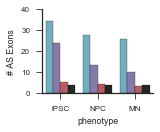

In [46]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.barplot(x='phenotype', hue='modality', y='# AS Exons',
               data=modalities_repetitive_counts, hue_order=modality_order, 
               palette=modality_palette, order=study.phenotype_order, ci=None)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='# AS Exons')
sns.despine()

In [47]:
modalities_repetitive_counts_filtered_minimum = \
    modalities_repetitive_counts.groupby(['repetitive_element_dfam_superfamily']).filter(lambda x: (x['# AS Exons'] >=10).any())
six.print_('modalities_repetitive_counts.shape', modalities_repetitive_counts.shape)
six.print_('modalities_repetitive_counts_filtered_minimum.shape', modalities_repetitive_counts_filtered_minimum.shape)
modalities_repetitive_counts_filtered_minimum.head()

modalities_repetitive_counts.shape (156, 5)
modalities_repetitive_counts_filtered_minimum.shape (83, 5)


,phenotype,modality,repetitive_element_dfam_superfamily,# AS Exons,% AS Exons
0,MN,bimodal,Alu,57,44.186047
1,MN,bimodal,CR1,5,3.875969
2,MN,bimodal,ERV1,1,0.775194
3,MN,bimodal,ERVL-MaLR,11,8.527132
6,MN,bimodal,L2,4,3.100775


In [48]:
modalities_repetitive_counts_filtered_minimum = modalities_repetitive_counts.loc[modalities_repetitive_counts['# AS Exons'] >= 10]
six.print_('modalities_repetitive_counts.shape', modalities_repetitive_counts.shape)
six.print_('modalities_repetitive_counts_filtered_minimum.shape', modalities_repetitive_counts_filtered_minimum.shape)
modalities_repetitive_counts_filtered_minimum.head()

modalities_repetitive_counts.shape (156, 5)
modalities_repetitive_counts_filtered_minimum.shape (37, 5)


,phenotype,modality,repetitive_element_dfam_superfamily,# AS Exons,% AS Exons
0,MN,bimodal,Alu,57,44.186047
3,MN,bimodal,ERVL-MaLR,11,8.527132
7,MN,bimodal,MIR,28,21.705426
10,MN,bimodal,hAT-Charlie,11,8.527132
19,MN,excluded,Alu,236,60.824742


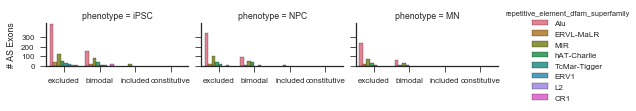

In [49]:
# fig, ax = plt.subplots(figsize=(2, 1.5))
g = sns.factorplot(x='modality', hue='repetitive_element_dfam_superfamily', y='# AS Exons',
                   data=modalities_repetitive_counts_filtered_minimum, order=modality_order, 
                   palette='husl',
#                palette=modality_palette, 
                   col='phenotype', kind='bar', size=1.5, aspect=1.6,
                   col_order=study.phenotype_order, ci=None)
# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# ax.set(ylabel='# AS Exons')
g.set(yticks=(0, 100, 200, 300), xlabel='')
sns.despine()
g.savefig('{}/repetitive_element_superfamily_per_modality_filtered_minimum.pdf'.format(figure_folder))

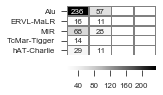

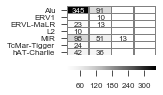

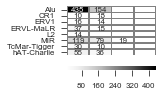

In [81]:
for phenotype, df in modalities_repetitive_counts_filtered_minimum.groupby('phenotype'):
    fig, ax = plt.subplots(figsize=(1.6, 1.25))
    matrix = df.pivot(index='repetitive_element_dfam_superfamily', columns='modality', values='# AS Exons')
    matrix = matrix.loc[:, modality_order]
#     matrix = matrix.astype(int)
    sns.heatmap(matrix, annot=True, cmap='Greys', fmt='.0f', linewidth=0.5, linecolor='grey', 
                cbar_kws=dict(orientation='horizontal'), annot_kws=dict(size=8))
    ax.set(xlabel='', ylabel='', xticks=[])
#     fig.tight_layout()
    fig.savefig('{}/repetitive_element_superfamily_per_modality_filtered_minimum_{}.pdf'.format(figure_folder, phenotype))

### Get total number of exons with repetitive elements

In [51]:
modalities_repetitive_no_commas.head()

,phenotype,modality,event_id,repetitive_element_dfam_superfamily
0,MN,bimodal,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694:+,hAT-Tip100
1,MN,excluded,exon:chr10:103360960-103361093:+@exon:chr10:103364897-103364969:+@exon:chr10:103368592-103368694...,hAT-Tip100
2,MN,bimodal,exon:chr10:104209950-104210087:+@exon:chr10:104211847-104211944:+@exon:chr10:104215094-104215184:+,Alu
3,MN,excluded,exon:chr10:105158173-105158285:+@exon:chr10:105159404-105159587:+@exon:chr10:105160154-105160285:+,Alu
4,MN,bimodal,exon:chr10:112661296-112661370:-@exon:chr10:112660784-112660880:-@exon:chr10:112658488-112660284:-,Alu


In [52]:
modalities_repetitive_counts_total = modalities_repetitive_no_commas.groupby(
    ['phenotype', 'modality'])['event_id'].apply(lambda x: len(x.unique()))
modalities_repetitive_counts_total = modalities_repetitive_counts_total.reset_index()
modalities_repetitive_counts_total = modalities_repetitive_counts_total.rename(columns={'event_id': '# AS Exons'})
modalities_repetitive_counts_total.head()

,phenotype,modality,# AS Exons
0,MN,bimodal,121
1,MN,constitutive,15
2,MN,excluded,377
3,MN,included,29
4,NPC,bimodal,227


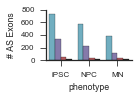

In [53]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.barplot(x='phenotype', hue='modality', y='# AS Exons',
               data=modalities_repetitive_counts_total, hue_order=modality_order, 
               palette=modality_palette, order=study.phenotype_order, ci=None)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='# AS Exons')
sns.despine()
fig.tight_layout()
fig.savefig('{}/repetitive_element_n_exons_with_repetitive_elements_per_modality.pdf'.format(figure_folder))

### Statistical Enrichment - hypergeometric test vs all exons in that modality

In [54]:
from scipy.stats import hypergeom

col = 'repetitive_element_dfam_superfamily'

lines = []

for phenotype, phenotype_df in modalities_repetitive.groupby(['phenotype']):
#     six.print_(phenotype)
    M = phenotype_df.shape[0]
    n = phenotype_df[col].count()
    for modality, modality_df in phenotype_df.groupby('modality'):
#         six.print_('\t', modality)
        N = modality_df.shape[0]
        x = modality_df[col].count()
        result = hypergeom.sf(x, M, n, N)
#         six.print_('\t\t', result)
        lines.append([phenotype, modality, result])
repetitive_element_significance = pd.DataFrame(lines, columns=['phenotype', 'modality', 'p-value'])
repetitive_element_significance['q-value'] = repetitive_element_significance['p-value'] * repetitive_element_significance.shape[0]
repetitive_element_significance.loc[repetitive_element_significance['q-value'] < 1e-3]

,phenotype,modality,p-value,q-value
1,MN,constitutive,0.000000e+00,0.000000e+00
2,MN,excluded,1.663709e-147,2.661934e-146
6,NPC,constitutive,0.000000e+00,0.000000e+00
7,NPC,excluded,3.256455e-224,5.210328e-223
11,iPSC,constitutive,0.000000e+00,0.000000e+00
12,iPSC,excluded,6.852022e-273,1.096324e-271


In [55]:
from scipy.stats import fisher_exact

In [56]:
fisher_exact([[x, N-x], [n-x, M-n-N]])

(1.2475524475524475, 0.56561714784938633)

## Ancient alternative splicing

In [57]:
prefix = 'exon2_merkin2012_ancient'
csv = '{}.csv'.format(prefix)

In [58]:
col = 'Ancient Alt Splicing'

In [59]:
alternative_merkin2012 = pd.read_csv('{}/{}'.format(alternative_feature_folder, csv), index_col=0, squeeze=True, header=None)
six.print_(alternative_merkin2012.shape)
alternative_merkin2012.name = col
alternative_merkin2012.head()

(46193,)


0
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-    False
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-    False
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-    False
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-    False
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+    False
Name: Ancient Alt Splicing, dtype: bool

No constitutive exons overlapped with any of the ancient Merkin2012 exons so we're ignoring constitutive for now.

In [60]:
modalities_merkin2012 = study.supplemental.modalities_tidy.join(alternative_merkin2012, on='event_id')
six.print_(modalities_merkin2012.shape)
modalities_merkin2012.head()

(26017, 4)


,phenotype,event_id,modality,Ancient Alt Splicing
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,included,False
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,bimodal,False
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,False
3,MN,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,False
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,bimodal,False


In [83]:
study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1316
           excluded         1175
           included         2995
           uncategorized       2
NPC        bimodal          2325
           excluded         1732
           included         4597
           uncategorized       4
iPSC       bimodal          3438
           excluded         2293
           included         6105
           middle              1
           uncategorized      34
dtype: int64

In [84]:
modalities_merkin2012.groupby(['phenotype', 'modality'])['Ancient Alt Splicing'].sum()

phenotype  modality     
MN         bimodal             20
           excluded             5
           included             6
           uncategorized        0
NPC        bimodal             45
           excluded             9
           included             6
           uncategorized        0
iPSC       bimodal             41
           excluded            15
           included            12
           middle           False
           uncategorized        2
Name: Ancient Alt Splicing, dtype: object

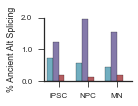

In [61]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.barplot(x='phenotype', y=col, hue='modality', hue_order=modality_order, 
            data=modalities_merkin2012, ci=None,
            palette=modality_palette, order=study.phenotype_order)
ax.locator_params('y', nbins=3)

yticks = ax.get_yticks()
yticklabels = 100 * yticks
ax.set(xlabel='', ylabel='% ' +col, yticklabels=yticklabels)
ax.legend_.set_visible(False)
sns.despine()
fig.tight_layout()
fig.savefig('{}/{}.pdf'.format(figure_folder, prefix))

### Statistical Enrichment - hypergeometric test vs all exons in that modality

In [62]:
from scipy.stats import hypergeom

lines = []

for phenotype, phenotype_df in modalities_merkin2012.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
        
    M = phenotype_df.shape[0]
    n = phenotype_df[col].sum()
    for modality, modality_df in phenotype_df.groupby('modality'):
#         six.print_('\t', modality)
        N = modality_df.shape[0]
        x = modality_df[col].sum()
        result = hypergeom.sf(x, M, n, N)
        lines.append([phenotype, modality, result])
enrichment = pd.DataFrame(lines, columns=['phenotype', 'modality', 'p_value'])

# multiple testing correction
enrichment['bonferonni_p_value'] = enrichment['p_value'] * enrichment.shape[0]
enrichment.head()
enrichment

MN
NPC
iPSC


,phenotype,modality,p_value,bonferonni_p_value
0,MN,bimodal,2.884473e-07,3.749815e-06
1,MN,excluded,6.792944e-01,8.830828e+00
2,MN,included,9.999381e-01,1.299920e+01
3,MN,uncategorized,1.126649e-02,1.464644e-01
4,NPC,bimodal,1.021085e-15,1.327410e-14
5,NPC,excluded,7.879338e-01,1.024314e+01
6,NPC,included,1.000000e+00,1.300000e+01
7,NPC,uncategorized,2.743791e-02,3.566928e-01
8,iPSC,bimodal,5.946046e-08,7.729860e-07
9,iPSC,excluded,2.675480e-01,3.478124e+00


## Gene age (phylostratum from Domazet-Loso MBE 2012)

In [63]:
study.expression.feature_data.head()

,biomark_neural_panel,confident_rbp,gencode_id,gene_name,gene_status,gene_type,havana_gene,level,rbp,ribosomal,...,gerstberger2014_rbp_target_diverse,gerstberger2014_rbp_family_targets,cell_surface_markers,gerstberger2014_tf,cell_cycle,domazetloso2008_phylostratum,bioguo_animaltfdb_tf,bioguo_animaltfdb_chromatin_remodeler,bioguo_animaltfdb_cofactor,max_exons_per_gene
ENSG00000000003,False,False,ENSG00000000003.10,TSPAN6,KNOWN,protein_coding,OTTHUMG00000022002.1,2,False,False,...,False,NaN,False,False,False,2,False,False,False,8
ENSG00000000005,False,False,ENSG00000000005.5,TNMD,KNOWN,protein_coding,OTTHUMG00000022001.1,2,False,False,...,False,NaN,False,False,False,11,False,False,False,7
ENSG00000000419,False,False,ENSG00000000419.8,DPM1,KNOWN,protein_coding,OTTHUMG00000032742.2,2,False,False,...,False,NaN,False,False,False,1,False,False,False,10
ENSG00000000457,False,False,ENSG00000000457.9,SCYL3,KNOWN,protein_coding,OTTHUMG00000035941.4,2,False,False,...,False,NaN,False,False,False,2,False,False,False,14
ENSG00000000460,False,False,ENSG00000000460.12,C1orf112,KNOWN,protein_coding,OTTHUMG00000035821.6,2,False,False,...,False,NaN,False,False,True,6,False,False,False,29


In [64]:
genes_with_constitutive_exons = pd.read_csv('{}/genes.csv'.format(constitutive_feature_folder), 
                                            index_col=0, header=None, squeeze=True)
six.print_(genes_with_constitutive_exons.shape)
genes_with_constitutive_exons.head()

(6250,)


0
exon:chr10:102039881-102039985:-                                    ENSG00000196072
exon:chr10:102040691-102040810:-                                    ENSG00000196072
exon:chr10:102045854-102045970:-                                    ENSG00000196072
exon:chr10:102045854-102046089:-                                    ENSG00000196072
exon:chr10:102286732-102286831:-    ENSG00000075826,ENSG00000166136,ENSG00000255339
Name: 1, dtype: object

In [65]:
genes_with_constitutive_exons_expanded = pd.concat([pd.Series(x.split(','), index=[i]*len(x.split(',')))
    for i, x in genes_with_constitutive_exons.iteritems()])
genes_with_constitutive_exons_expanded.head()

exon:chr10:102039881-102039985:-    ENSG00000196072
exon:chr10:102040691-102040810:-    ENSG00000196072
exon:chr10:102045854-102045970:-    ENSG00000196072
exon:chr10:102045854-102046089:-    ENSG00000196072
exon:chr10:102286732-102286831:-    ENSG00000075826
dtype: object

In [66]:
genes_with_constitutive_exons_expanded.name = 'ensembl_id'
genes_with_constitutive_exons_expanded.index.name = 'event_id'
genes_with_constitutive_exons_expanded.head()

event_id
exon:chr10:102039881-102039985:-    ENSG00000196072
exon:chr10:102040691-102040810:-    ENSG00000196072
exon:chr10:102045854-102045970:-    ENSG00000196072
exon:chr10:102045854-102046089:-    ENSG00000196072
exon:chr10:102286732-102286831:-    ENSG00000075826
Name: ensembl_id, dtype: object

In [67]:
genes_with_constitutive_exons_expanded.to_csv('{}/genes_expanded.csv'.format(constitutive_feature_folder))

In [68]:
constitutive_genes_modalities = make_phenotype_modality_format(genes_with_constitutive_exons_expanded)
constitutive_genes_modalities.head()

(19398, 4)


,event_id,ensembl_id,modality,phenotype
0,exon:chr10:102039881-102039985:-,ENSG00000196072,constitutive,iPSC
1,exon:chr10:102040691-102040810:-,ENSG00000196072,constitutive,iPSC
2,exon:chr10:102045854-102045970:-,ENSG00000196072,constitutive,iPSC
3,exon:chr10:102045854-102046089:-,ENSG00000196072,constitutive,iPSC
4,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC


In [69]:
event_id_to_genes = pd.concat([pd.Series(x.split(','), index=[i]*len(x.split(',')))
    for i, x in study.splicing.feature_data['one_ensembl_id'].iteritems() if isinstance(x, str)])
event_id_to_genes.head()

exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-    ENSG00000107521
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-    ENSG00000107521
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-    ENSG00000107521
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-    ENSG00000120053
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+    ENSG00000198018
dtype: object

In [70]:
event_id_to_genes.head()
event_id_to_genes.name = 'ensembl_id'

### Add constitutive exons and their genes

In [71]:
event_id_to_genes.to_csv('{}/genes_expanded.csv'.format(alternative_feature_folder))

In [72]:
modalities_genes = study.supplemental.modalities_tidy.join(event_id_to_genes, on='event_id')
modalities_genes = pd.concat([modalities_genes, constitutive_genes_modalities])
modalities_genes.head()

,ensembl_id,event_id,modality,phenotype
0,ENSG00000120053,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,included,MN
1,ENSG00000014919,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,bimodal,MN
2,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,MN
3,ENSG00000255339,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,MN
4,ENSG00000055950,exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,bimodal,MN


Add phylostratum

In [73]:
col = 'domazetloso2008_phylostratum'
modalities_genes = modalities_genes.join(study.expression.feature_data[col], on='ensembl_id')
modalities_genes.head()

,ensembl_id,event_id,modality,phenotype,domazetloso2008_phylostratum
0,ENSG00000120053,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,included,MN,1
1,ENSG00000014919,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,bimodal,MN,1
2,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,included,MN,1
3,ENSG00000255339,exon:chr10:102286732-102286831:-@exon:chr10:102286156-102286311:-@exon:chr10:102283500-102283686:-,included,MN,NaN
4,ENSG00000055950,exon:chr10:102747070-102747240:-@exon:chr10:102746847-102746953:-@exon:chr10:102746506-102746732:-,bimodal,MN,2


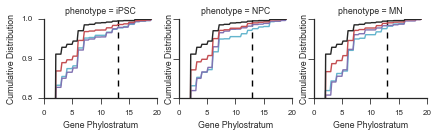

In [74]:
g = sns.FacetGrid(modalities_genes, **facet_kws)
g.map(cdfplot, col)

ylim = ymin, ymax = (0.8, 1)
g.set(ylim=ylim, yticks=(0.8, 0.9, 1), ylabel='Cumulative Distribution', xlabel='Gene Phylostratum')
for ax in g.axes.flat:
    ax.vlines(13, ymin, ymax, linestyle='--', color='k')
g.savefig('{}/{}_cdf.pdf'.format(figure_folder, col))

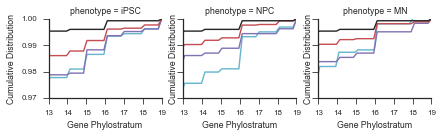

In [75]:
g = sns.FacetGrid(modalities_genes, **facet_kws)
g.map(cdfplot, col)
g.set(ylim=(0.97, 1), yticks=(0.97, 0.98, .99, 1),
      xlim=(13, 19), 
      ylabel='Cumulative Distribution', 
      xlabel='Gene Phylostratum')
g.savefig('{}/{}_cdf_13plus.pdf'.format(figure_folder, col))

### Statistical testing - Pairwise Mann whitney U

MN
NPC
iPSC
modality1      excluded    bimodal   included  constitutive
excluded            NaN  -0.276116   2.526244     13.083084
bimodal       -0.276116        NaN  10.036681     28.041144
included       2.526244  10.036681        NaN      5.200465
constitutive  13.083084  28.041144   5.200465           NaN


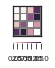

In [76]:
from scipy.stats.mstats import kruskalwallis
lines = []

for phenotype, phenotype_df in modalities_genes.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
#     constitutive = grouped.get_group('constitutive')
    
    for (modality1, df1), (modality2, df2) in itertools.combinations(grouped, 2):
#         if modality == 'constitutive':
#             continue
#         six.print_('\t', modality1, modality2)

        result = mannwhitneyu(df1[col], df2[col])
#         six.print_('\t\t', result)
#         results.loc[modality1, modality2] = result.pvalue
        lines.append([phenotype, modality1, modality2, result.pvalue, result.statistic])
enrichment = pd.DataFrame(lines, columns=['phenotype', 'modality1', 'modality2', 'p_value', 'statistic'])

# multiple testing correction
enrichment['bonferonni_p_value'] = enrichment['p_value'] * enrichment.shape[0]
enrichment.head()

# Transform tidy dataframe into 2d matrix
enrichment_2d = enrichment.groupby('phenotype').apply(
    lambda x: x.pivot(index='modality1', columns='modality2', values='bonferonni_p_value'))
enrichment_2d = enrichment_2d.loc[:, modality_order]
enrichment_2d_log10 = -np.log10(enrichment_2d)

# Plot p-value heatmap
ipsc = enrichment_2d_log10.loc['iPSC']
ipsc = ipsc.loc[modality_order]
ipsc = ipsc.T.fillna(0) + ipsc.fillna(0)
ipsc = ipsc.replace(0, np.nan)
six.print_(ipsc)

fig, ax = plt.subplots(figsize=(.5, .75))
sns.heatmap(ipsc, vmin=0, vmax=15, linewidth=0.5, linecolor='grey', cbar_kws=dict(orientation='horizontal'))
ax.set(xticks=[], yticks=[], xlabel='', ylabel='');
sns.despine(left=False, bottom=False, right=False, top=False)
fig.savefig('{}/{}_p_value_heatmap.pdf'.format(figure_folder, col))

### statistical testing for phylostrata 13 (tetrapoda) and higher

TO compare to Merkin 2012

In [77]:
phylostrata_13plus = modalities_genes.query('domazetloso2008_phylostratum >= 13')
phylostrata_13plus.head()

,ensembl_id,event_id,modality,phenotype,domazetloso2008_phylostratum
289,ENSG00000154096,exon:chr11:119293823-119294838:-@exon:chr11:119291579-119291639:-@exon:chr11:119290761-119291096:-,bimodal,MN,14
387,ENSG00000166352,exon:chr11:36616121-36616191:+@exon:chr11:36619194-36619280:+@exon:chr11:36631631-36631789:+,excluded,MN,13
388,ENSG00000166352,exon:chr11:36631631-36631789:+@exon:chr11:36654834-36654988:+@exon:chr11:36657601-36657667:+,included,MN,13
389,ENSG00000166352,exon:chr11:36654834-36654988:+@exon:chr11:36657601-36657667:+@exon:chr11:36669566-36669705:+,bimodal,MN,13
390,ENSG00000166352,exon:chr11:36657601-36657667:+@exon:chr11:36669566-36669705:+@exon:chr11:36680569-36680824:+,included,MN,13


MN
NPC
iPSC
modality1     excluded   bimodal  included  constitutive
excluded           NaN -1.357061 -1.405163     -1.276988
bimodal      -1.357061       NaN -1.333474     -1.234941
included     -1.405163 -1.333474       NaN     -1.210779
constitutive -1.276988 -1.234941 -1.210779           NaN


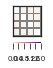

In [78]:
from scipy.stats.mstats import kruskalwallis
lines = []

for phenotype, phenotype_df in phylostrata_13plus.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
#     constitutive = grouped.get_group('constitutive')
    
    for (modality1, df1), (modality2, df2) in itertools.combinations(grouped, 2):
#         if modality == 'constitutive':
#             continue
#         six.print_('\t', modality1, modality2)

        result = mannwhitneyu(df1[col], df2[col])
#         six.print_('\t\t', result)
#         results.loc[modality1, modality2] = result.pvalue
        lines.append([phenotype, modality1, modality2, result.pvalue, result.statistic])
enrichment = pd.DataFrame(lines, columns=['phenotype', 'modality1', 'modality2', 'p_value', 'statistic'])

# multiple testing correction
enrichment['bonferonni_p_value'] = enrichment['p_value'] * enrichment.shape[0]

# Transform tidy dataframe into 2d matrix
enrichment_2d = enrichment.groupby('phenotype').apply(
    lambda x: x.pivot(index='modality1', columns='modality2', values='bonferonni_p_value'))
enrichment_2d = enrichment_2d.loc[:, modality_order]
enrichment_2d_log10 = -np.log10(enrichment_2d)

# Plot p-value heatmap
ipsc = enrichment_2d_log10.loc['iPSC']
ipsc = ipsc.loc[modality_order]
ipsc = ipsc.T.fillna(0) + ipsc.fillna(0)
ipsc = ipsc.replace(0, np.nan)
six.print_(ipsc)

fig, ax = plt.subplots(figsize=(.5, .75))
sns.heatmap(ipsc, vmin=0, vmax=2, linewidth=0.5, linecolor='grey', cbar_kws=dict(orientation='horizontal'))
ax.set(xticks=[], yticks=[], xlabel='', ylabel='');
sns.despine(left=False, bottom=False, right=False, top=False)
fig.savefig('{}/{}_p_value_heatmap_13plus.pdf'.format(figure_folder, col))